In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns = ["var","skewness","curtosis","entropy","class"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00267/\
data_banknote_authentication.txt",index_col=False, names = columns)

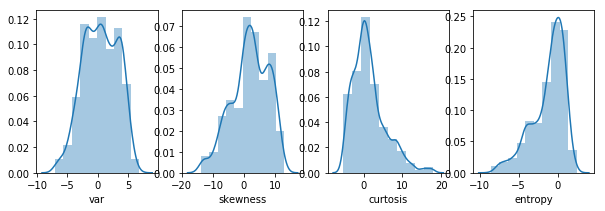

In [3]:
f, ax = plt.subplots(1, 4, figsize=(10,3))
vis1 = sns.distplot(df["var"],bins=10, ax= ax[0])
vis2 = sns.distplot(df["skewness"],bins=10, ax=ax[1])
vis3 = sns.distplot(df["curtosis"],bins=10, ax= ax[2])
vis4 = sns.distplot(df["entropy"],bins=10, ax=ax[3])
f.savefig('subplot.png')


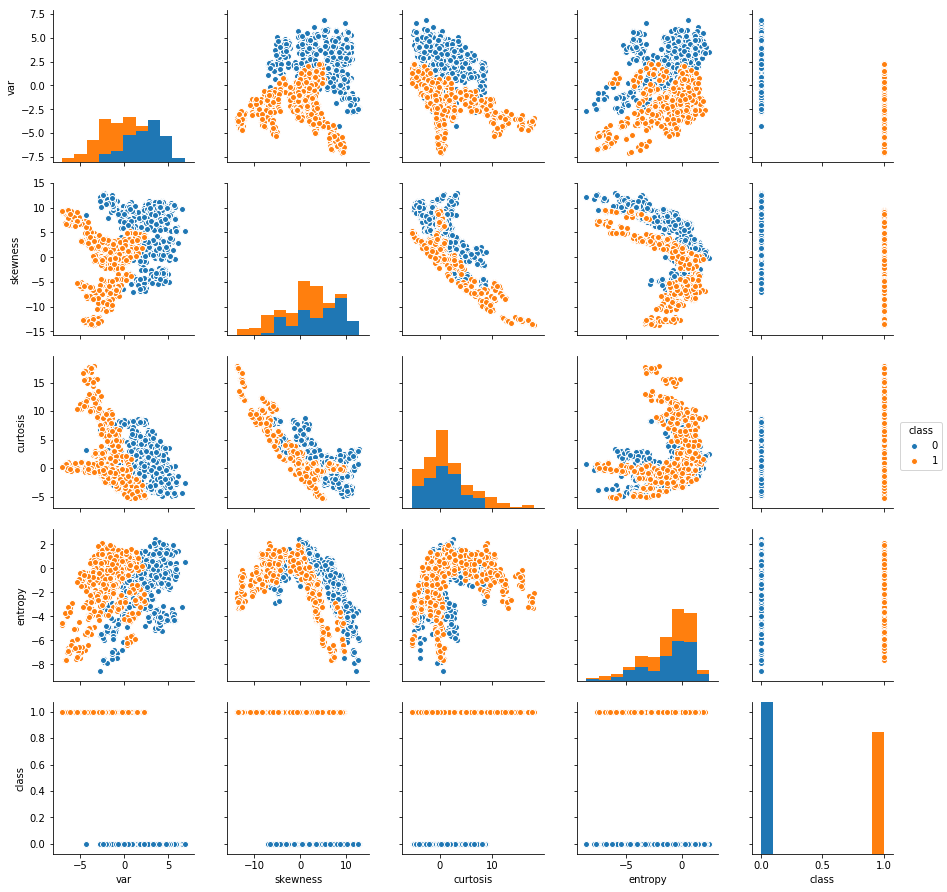

In [4]:
sns.pairplot(df, hue="class")

In [6]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values
from sklearn.preprocessing import StandardScaler
X_sd = StandardScaler().fit_transform(X)

In [9]:
cov_matrix = np.cov(X_sd.T)
print('Covariance Matrix \n%s', cov_matrix)

e_vals, e_vecs = np.linalg.eig(cov_matrix)
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00072939  0.26421811 -0.38112776  0.2770186 ]
 [ 0.26421811  1.00072939 -0.78746918 -0.52670474]
 [-0.38112776 -0.78746918  1.00072939  0.31907345]
 [ 0.2770186  -0.52670474  0.31907345  1.00072939]]
Eigenvectors 
[[-0.24877213 -0.75459093  0.60346443  0.06734722]
 [-0.6393234   0.05034037 -0.11596089 -0.75847512]
 [ 0.6127065   0.1534594   0.5096688  -0.58419061]
 [ 0.39238854 -0.6360099  -0.6021806  -0.28089352]]

Eigenvalues 
[2.18149408 1.29409812 0.35163873 0.17568664]


In [13]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.49760184  86.82647434  95.61103519 100.        ]


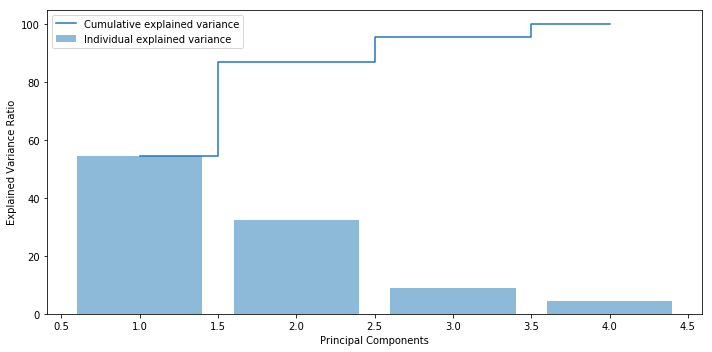

In [14]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [15]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:5]

[(2.1814940839743375,
  array([-0.24877213, -0.6393234 ,  0.6127065 ,  0.39238854])),
 (1.29409811998357,
  array([-0.75459093,  0.05034037,  0.1534594 , -0.6360099 ])),
 (0.3516387304631079,
  array([ 0.60346443, -0.11596089,  0.5096688 , -0.6021806 ])),
 (0.17568664398890413,
  array([ 0.06734722, -0.75847512, -0.58419061, -0.28089352]))]

In [19]:
w = np.hstack((eigen_pairs[0][1].reshape(4,1), 
                      eigen_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', w)
X_sd_pca = X_sd.dot(w)

Matrix W:
 [[-0.24877213 -0.75459093]
 [-0.6393234   0.05034037]
 [ 0.6127065   0.1534594 ]
 [ 0.39238854 -0.6360099 ]]


In [20]:
X_sd.shape, w.shape, X_sd_pca.shape

((1372, 4), (4, 2), (1372, 2))

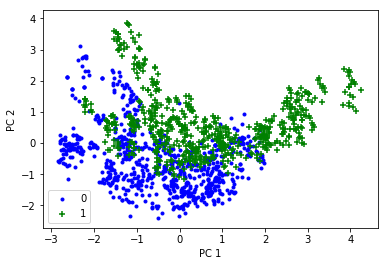

In [23]:
# For the scatter plot, we take data points from X_train_pca PC1 and PC2 for all those cases where y_train lable is L 
# where L  can vary from 1,2,3.
# For each L, a corresponding color and marker is used in the plot

colors = ['b', 'g']
markers = ['.', '+']

for l, c, m in zip(np.unique(y), colors, markers):
    plt.scatter(X_sd_pca[y==l, 0], X_sd_pca[y==l , 1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.show()